# Aorta

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from scipy.stats import norm

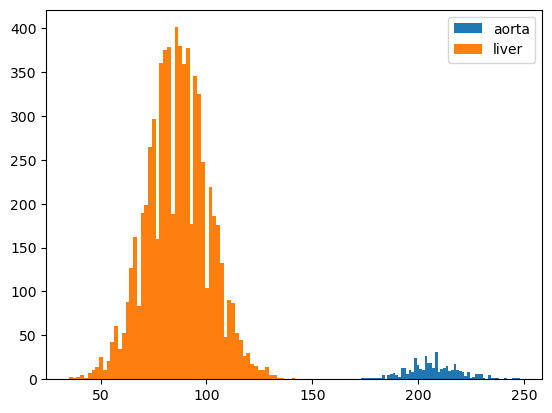

In [2]:
in_dir = "spring2022_data/Aorta/"

ct = dicom.read_file(in_dir + '1-442.dcm')
img = ct.pixel_array

aorta_roi = io.imread(in_dir + 'AortaROI.png')
liver_roi = io.imread(in_dir + 'LiverROI.png')

aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]
mu_aorta = np.mean(aorta_values)
std_aorta = np.std(aorta_values)

liver_mask = liver_roi > 0
liver_values = img[liver_mask]
mu_liver = np.mean(liver_values)
std_liver = np.std(liver_values)

plt.hist(aorta_values, bins=60, label='aorta')
plt.hist(liver_values, bins=60, label='liver')
plt.legend()
plt.show()


In [3]:
# find the point when the pdf for bone > pdf soft tissue
for test_value in range(125,175):
    if norm.pdf(test_value, mu_aorta, std_aorta) > norm.pdf(test_value, mu_liver, std_liver):
        print(f"For value {test_value} the class is aorta")
        break
    

For value 151 the class is aorta


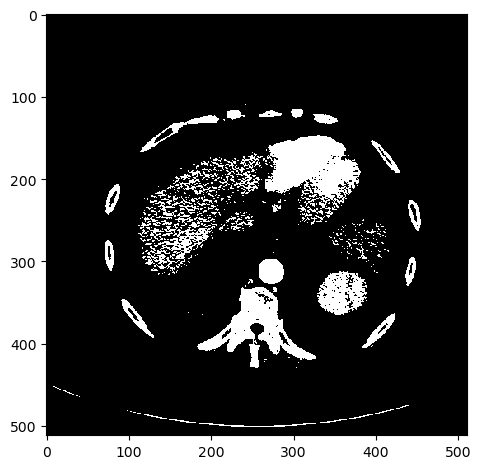

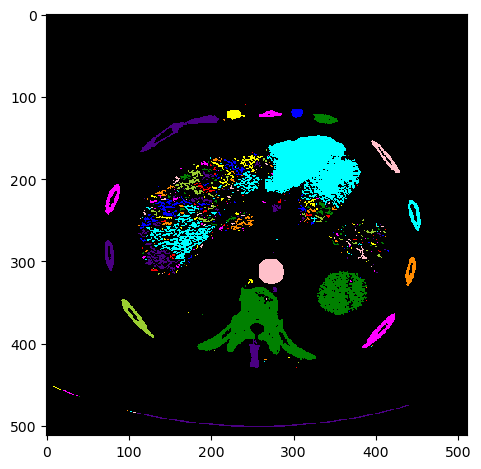

Number of labels: 469


In [4]:
from skimage import segmentation, measure
from skimage.color import label2rgb, rgb2gray

bin_img = img > 90
bin_img = segmentation.clear_border(bin_img)
io.imshow(bin_img)
io.show()

label_img = measure.label(bin_img,connectivity=2)
rgblabel_img = label2rgb(label_img)
io.imshow(rgblabel_img)
io.show()

n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

In [5]:
def circularity(area, perimeter):
    f_circ = 4*math.pi*area/(perimeter**2)
    return f_circ
    

440.4375


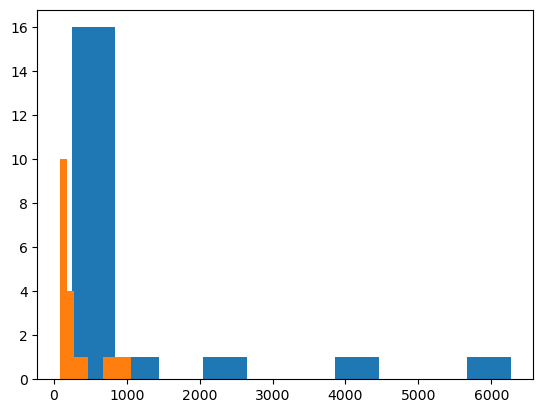

In [6]:
import math
region_props = measure.regionprops(label_img)

areas = np.array([prop.area for prop in region_props])
perimeters = np.array([prop.perimeter for prop in region_props])

new_areas=[]
new_perimeters=[]
for idx in range(len(areas)):
    if areas[idx]>=200:
        new_areas.append(areas[idx])
        new_perimeters.append(perimeters[idx])
        
circ = [circularity(new_areas[i], new_perimeters[i]) for i in range(len(new_areas))]

plt.hist(new_areas)
plt.hist(new_perimeters)

aorta_blob = np.argmax(circ)
print(new_areas[aorta_blob]*0.75*0.75)

# newnew_areas=[]
# new_perimeters=[]
# new_circ=[]
# for idx in range(len(circ)):
#     c = circ[idx]
#     if c>0.95:
#         new_circ.append(c)
#         newnew_areas.append(new_areas[idx])

In [7]:
print(mu_aorta)
print(std_aorta)

206.99287410926365
12.658963440876713


In [8]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb, rgb2gray
from skimage import color

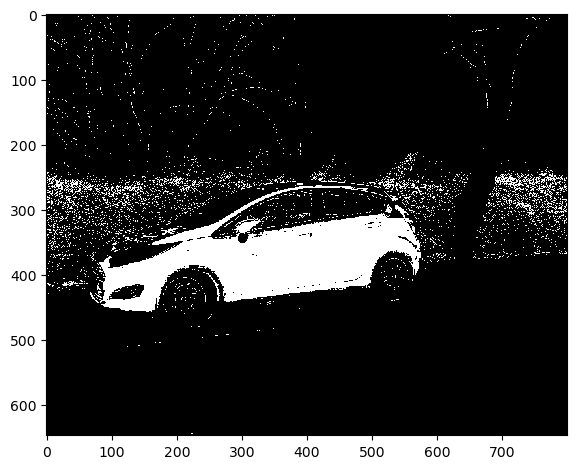

In [9]:
in_dir = "ExamF2022Solution/CarData/"
img_name = "car.png"
input_img = io.imread(in_dir + img_name)

hsv_img = color.rgb2hsv(input_img)
# hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
# value_img = hsv_img[:, :, 2]

bin_img = sat_img > 0.7
io.imshow(bin_img)
io.show()

In [10]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, org_name, filter_name):
    """
    convenience function to show two images side by side:
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(org_name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

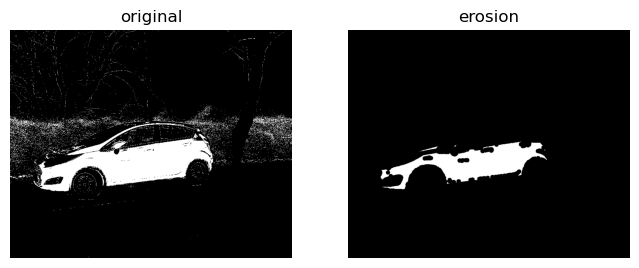

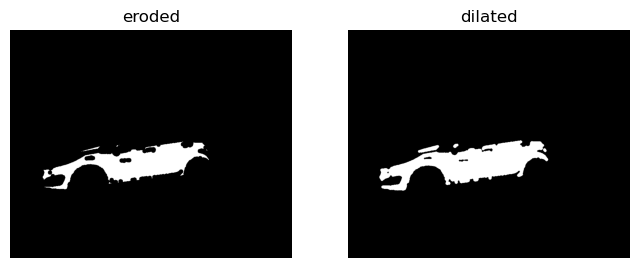

31365

In [11]:
from skimage.morphology import erosion, dilation, opening, closing, disk 

footprint = disk(6)     # radius 2
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'original', 'erosion')

dilated = dilation(eroded, disk(4))
plot_comparison(eroded, dilated, 'eroded', 'dilated')

np.count_nonzero(dilated)

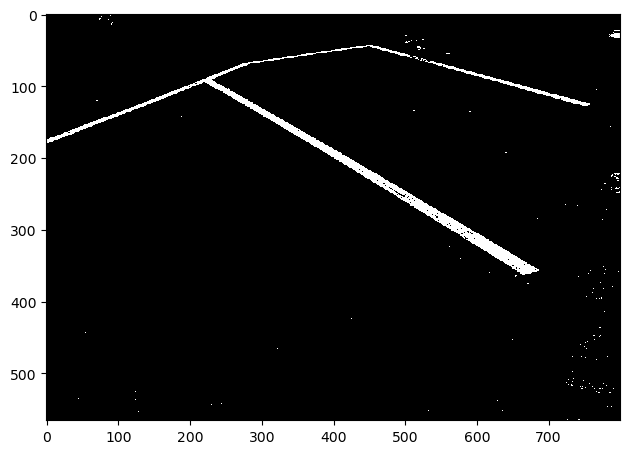

C:\Users\yufan\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


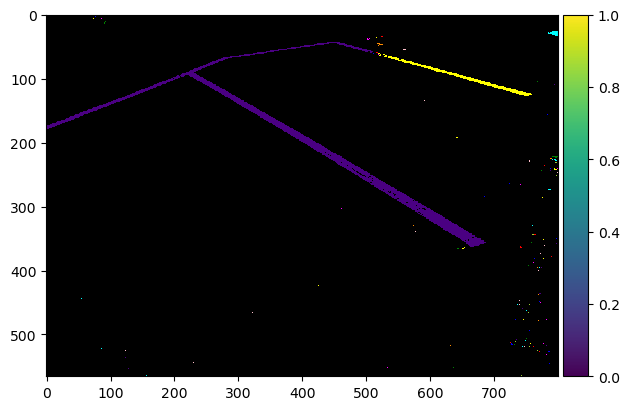

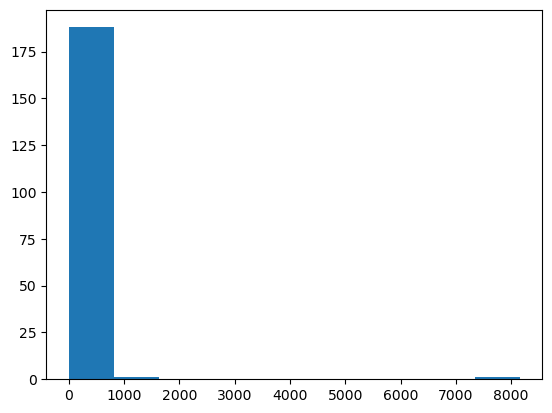

In [12]:
img_name = "road.png"
input_img = io.imread(in_dir + img_name)

hsv_img = color.rgb2hsv(input_img)
# hue_img = hsv_img[:, :, 0]
# sat_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

bin_img = value_img > 0.9
io.imshow(bin_img)
io.show()

label_img = measure.label(bin_img,connectivity=2)
rgblabel_img = label2rgb(label_img)
io.imshow(rgblabel_img)
io.show()


region_props = measure.regionprops(label_img)
areas = [prop.area for prop in region_props]
plt.hist(areas)
plt.show()

In [13]:
new_areas = [area for area in areas if area>1000]
new_areas

[8158, 1047]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from IPython.display import clear_output
from skimage import img_as_ubyte

## Transformation Matrix

In [5]:
theta=20
theta=np.deg2rad(theta)
Sx = 2
Sy = 2
Tx = 3.1
Ty = -3.3
X = np.array([[10],[10]])

R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])
S = np.array([[Sx, 0], 
              [0, Sy]])
t = np.array([[Tx],[Ty]])

X_prime = S@R@X + t
X_prime

array([[15.05344955],
       [22.33425528]])

In [16]:
import numpy as np

in_dir = "ExamF2022Solution/PCAData/"
txt_name = "soccer_data.txt"
x = np.loadtxt(in_dir + txt_name, comments="%")

# Check matric dimensions
n_feat = x.shape[1]   # columns
n_obs = x.shape[0]    # rows
print(f"Number of features: {n_feat} and number of observations: {n_obs}")


Number of features: 6 and number of observations: 2964


In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['short passing', 'long passing','acceleration',
                             'sprint speed', 'agility','stamina'])
plt.show()
x.shape

<Figure size 640x480 with 0 Axes>

(2964, 6)

In [18]:
# Direct PCA using the decompositions functions

from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)
print("shape: ", data_transform.shape)
np.max(data_transform)

shape:  (2964, 6)


106.07883060049048

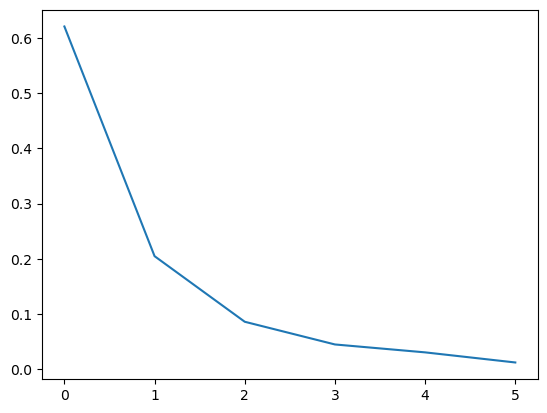

In [19]:
plt.plot(pca.explained_variance_ratio_)

## Grain Classfication

In [20]:
mu_bad = 25
std_bad = 10
mu_med = 52
std_med = 2
mu_high = 150
std_high = 30


for test_value in range(mu_med,mu_high):
    if norm.pdf(test_value, mu_med, std_med) < \
    norm.pdf(test_value, mu_high, std_high):
        print(f"For value {test_value} the class is high")
        break

For value 60 the class is high


In [21]:
print(norm.pdf(59.6, mu_high, std_high))
print(norm.pdf(59.6, mu_med, std_med))

0.00014192315571814757
0.00014597346289572976


## Image Registration

In [22]:
import scipy.io
file_dir = 'ExamF2022Solution/Landmarks/'
moving_mat = scipy.io.loadmat(file_dir+'playmovingPoints.mat')
fixed_mat = scipy.io.loadmat(file_dir+'playfixedPoints.mat')

src = moving_mat["movingPoints"]
dst = fixed_mat["fixedPoints"]


In [23]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from skimage import io, img_as_float, img_as_ubyte
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform 

In [24]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

In [25]:
# find optimal transform of src points/landmarks
tform = EuclideanTransform()
tform.estimate(src, dst)

True

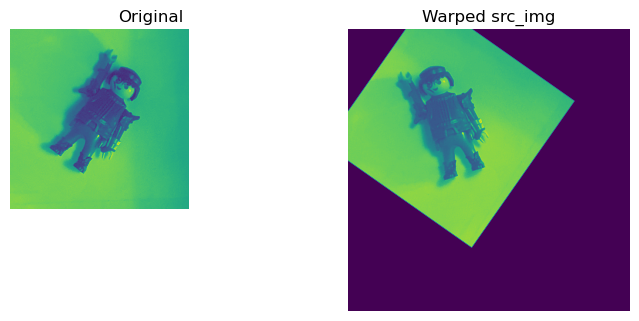

In [37]:
src_img = io.imread(file_dir+'play5.png')
expanded_shape = (1028, 1029)
warped = warp(src_img, tform, output_shape=expanded_shape)
show_comparison(src_img, warped, "Warped src_img")

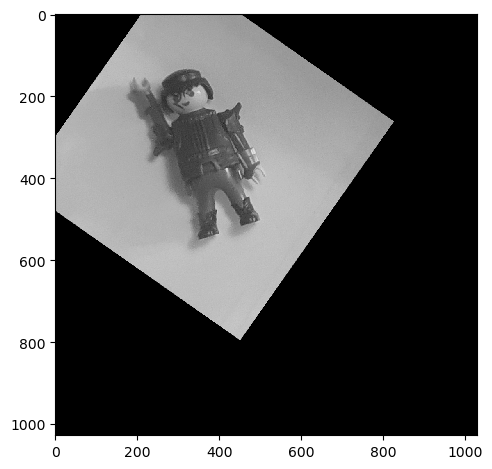

In [38]:
ubyte_warped = img_as_ubyte(warped)
io.imshow(ubyte_warped)

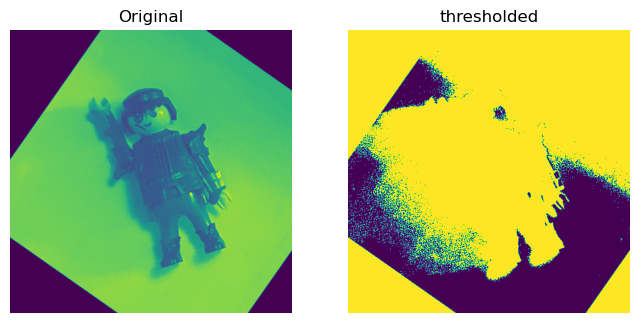

In [28]:
thresholded = ubyte_warped < 180
show_comparison(warped, thresholded, "thresholded")

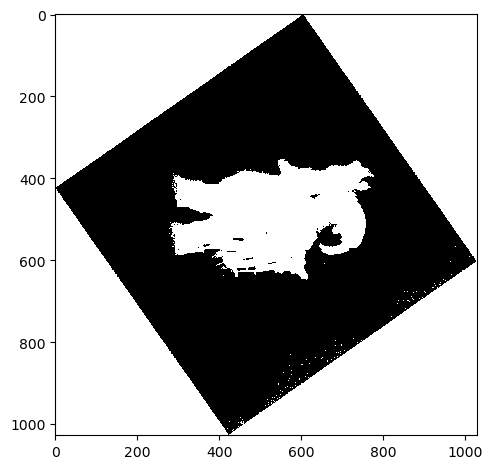

In [30]:
ref_img = io.imread(file_dir+'reference.png')
io.imshow(ref_img)

In [31]:
print(ref_img.shape)
print(src_img.shape)
print(ubyte_warped.shape)

(1028, 1029)
(655, 653)
(655, 653)


In [32]:
play1_img = io.imread(file_dir+'play1.png')
print(play1_img.shape)

(532, 684)


In [33]:
from scipy.spatial import distance
ref_img = io.imread(file_dir+'reference.png')
dice_score = 1 - distance.dice(ref_img.ravel(), thresholded.ravel())

ValueError: operands could not be broadcast together with shapes (1057812,) (427715,) 

In [34]:
# euclidean distance
np.linalg.norm(src[0]-dst[0])

165.7348824957671

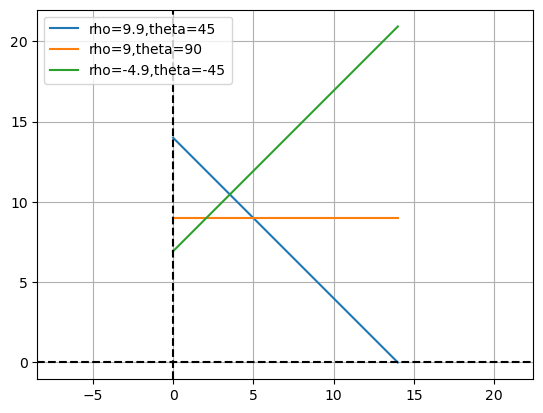

In [36]:
rhos=[9.9,9,-4.9]
thetas=[45,90,-45]

x = range(15)
for rho,theta in zip(rhos,thetas):
#     theta=theta+90
    theta_rad = np.deg2rad(theta)
    cot = 1/np.tan(theta_rad)
    cosec = 1/np.sin(theta_rad)
    y = x*(-cot)+rho*cosec
    plt.plot(x,y,label=f'rho={rho},theta={theta}')
    
plt.axvline(x=0, c="black",ls='--')
plt.axhline(y=0, c="black",ls='--')
plt.legend()
plt.xlim([-5,15])
# plt.ylim(0,15)
plt.axis('equal')
plt.grid()
plt.show()